## Project Introduction

In early steps of development of vaccines, diagnostic tests and therapeutic interventions against infections, identification of <b>Linear B-cell epitopes</b> is very important. These are short protein fragments that are recognized by certain components of the immune system. It requires a lot of resources to carry out experimental discovery of epitopes and there has been use of computational methods over the past 3 decades to help in prioritizing candidates for characterization in the lab.

This project is based on predicting the epitopes of <b>Alphavirus</b> which is a genus of <b>mosquito-borne</b> viruses that includes pathogens of medical concert such as <b>Chikungunya</b> and other viruses that affect millions of people, mainly in the Global South but with the potential to migrate to the north due to climatic change.

The objective of this project is to develope an efficient <b>Data mining pipeline</b> to potentially predict new, previously unkown epitopes in viruses based on this genus.

<b>Data</b>

More than one data of the same structure is used in this project. There will be an optimal tradeoff between data using a training data of a smaller amount of data coming from viruses that are more similar to our target ones, and using a lager volume of data coming from potentially different viruses.

More than one classification models will be created then assesed for performance metric using <b>Area under ROC curve (AUC)</b>. The performance metrics will then be compared to identify the one that <b>generalizes</b> better than the other(s). The best one will be used to draw conclusions, make decisions and recommendations in the project's report.

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot
import seaborn as sns

## Exploratory Data Analysis

In [67]:
# enable display of all columns
pd.set_option("display.max_columns", None)
# pd.set_option("display.max_rows", None)

In [68]:
# load the dataset
dataset = pd.read_csv("df_training_level11.csv")
df = pd.DataFrame(dataset)
df.head()

C:\Users\ojare\AppData\Local\Temp\ipykernel_10780\4208888110.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("df_training_level11.csv")


,Info_PepID,Info_organism_id,Info_protein_id,Info_pos,Info_AA,Info_pubmed_id,Info_epitope_id,Info_host_id,Info_nPos,Info_nNeg,Info_type,Info_window,Info_cluster,Class,feat_esm1b_0,feat_esm1b_1,feat_esm1b_2,feat_esm1b_3,feat_esm1b_4,feat_esm1b_5,feat_esm1b_6,feat_esm1b_7,feat_esm1b_8,feat_esm1b_9,feat_esm1b_10,feat_esm1b_11,feat_esm1b_12,feat_esm1b_13,feat_esm1b_14,feat_esm1b_15,feat_esm1b_16,feat_esm1b_17,feat_esm1b_18,feat_esm1b_19,feat_esm1b_20,feat_esm1b_21,feat_esm1b_22,feat_esm1b_23,feat_esm1b_24,feat_esm1b_25,feat_esm1b_26,feat_esm1b_27,feat_esm1b_28,feat_esm1b_29,feat_esm1b_30,feat_esm1b_31,feat_esm1b_32,feat_esm1b_33,feat_esm1b_34,feat_esm1b_35,feat_esm1b_36,feat_esm1b_37,feat_esm1b_38,feat_esm1b_39,feat_esm1b_40,feat_esm1b_41,feat_esm1b_42,feat_esm1b_43,feat_esm1b_44,feat_esm1b_45,feat_esm1b_46,feat_esm1b_47,feat_esm1b_48,feat_esm1b_49,feat_esm1b_50,feat_esm1b_51,feat_esm1b_52,feat_esm1b_53,feat_esm1b_54,feat_esm1b_55,feat_esm1b_56,feat_esm1b_57,feat_esm1b_58,feat_esm1b_59,feat_esm1b_60,feat_esm1b_61,feat_esm1b_62,feat_esm1b_63,feat_esm1b_64,feat_esm1b_65,feat_esm1b_66,feat_esm1b_67,feat_esm1b_68,feat_esm1b_69,feat_esm1b_70,feat_esm1b_71,feat_esm1b_72,feat_esm1b_73,feat_esm1b_74,feat_esm1b_75,feat_esm1b_76,feat_esm1b_77,feat_esm1b_78,feat_esm1b_79,feat_esm1b_80,feat_esm1b_81,feat_esm1b_82,feat_esm1b_83,feat_esm1b_84,feat_esm1b_85,feat_esm1b_86,feat_esm1b_87,feat_esm1b_88,feat_esm1b_89,feat_esm1b_90,feat_esm1b_91,feat_esm1b_92,feat_esm1b_93,feat_esm1b_94,feat_esm1b_95,feat_esm1b_96,feat_esm1b_97,feat_esm1b_98,feat_esm1b_99,feat_esm1b_100,feat_esm1b_101,feat_esm1b_102,feat_esm1b_103,feat_esm1b_104,feat_esm1b_105,feat_esm1b_106,feat_esm1b_107,feat_esm1b_108,feat_esm1b_109,feat_esm1b_110,feat_esm1b_111,feat_esm1b_112,feat_esm1b_113,feat_esm1b_114,feat_esm1b_115,feat_esm1b_116,feat_esm1b_117,feat_esm1b_118,feat_esm1b_119,feat_esm1b_120,feat_esm1b_121,feat_esm1b_122,feat_esm1b_123,feat_esm1b_124,feat_esm1b_125,feat_esm1b_126,feat_esm1b_127,feat_esm1b_128,feat_esm1b_129,feat_esm1b_130,feat_esm1b_131,feat_esm1b_132,feat_esm1b_133,feat_esm1b_134,feat_esm1b_135,feat_esm1b_136,feat_esm1b_137,feat_esm1b_138,feat_esm1b_139,feat_esm1b_140,feat_esm1b_141,feat_esm1b_142,feat_esm1b_143,feat_esm1b_144,feat_esm1b_145,feat_esm1b_146,feat_esm1b_147,feat_esm1b_148,feat_esm1b_149,feat_esm1b_150,feat_esm1b_151,feat_esm1b_152,feat_esm1b_153,feat_esm1b_154,feat_esm1b_155,feat_esm1b_156,feat_esm1b_157,feat_esm1b_158,feat_esm1b_159,feat_esm1b_160,feat_esm1b_161,feat_esm1b_162,feat_esm1b_163,feat_esm1b_164,feat_esm1b_165,feat_esm1b_166,feat_esm1b_167,feat_esm1b_168,feat_esm1b_169,feat_esm1b_170,feat_esm1b_171,feat_esm1b_172,feat_esm1b_173,feat_esm1b_174,feat_esm1b_175,feat_esm1b_176,feat_esm1b_177,feat_esm1b_178,feat_esm1b_179,feat_esm1b_180,feat_esm1b_181,feat_esm1b_182,feat_esm1b_183,feat_esm1b_184,feat_esm1b_185,feat_esm1b_186,feat_esm1b_187,feat_esm1b_188,feat_esm1b_189,feat_esm1b_190,feat_esm1b_191,feat_esm1b_192,feat_esm1b_193,feat_esm1b_194,feat_esm1b_195,feat_esm1b_196,feat_esm1b_197,feat_esm1b_198,feat_esm1b_199,feat_esm1b_200,feat_esm1b_201,feat_esm1b_202,feat_esm1b_203,feat_esm1b_204,feat_esm1b_205,feat_esm1b_206,feat_esm1b_207,feat_esm1b_208,feat_esm1b_209,feat_esm1b_210,feat_esm1b_211,feat_esm1b_212,feat_esm1b_213,feat_esm1b_214,feat_esm1b_215,feat_esm1b_216,feat_esm1b_217,feat_esm1b_218,feat_esm1b_219,feat_esm1b_220,feat_esm1b_221,feat_esm1b_222,feat_esm1b_223,feat_esm1b_224,feat_esm1b_225,feat_esm1b_226,feat_esm1b_227,feat_esm1b_228,feat_esm1b_229,feat_esm1b_230,feat_esm1b_231,feat_esm1b_232,feat_esm1b_233,feat_esm1b_234,feat_esm1b_235,feat_esm1b_236,feat_esm1b_237,feat_esm1b_238,feat_esm1b_239,feat_esm1b_240,feat_esm1b_241,feat_esm1b_242,feat_esm1b_243,feat_esm1b_244,feat_esm1b_245,feat_esm1b_246,feat_esm1b_247,feat_esm1b_248,feat_esm1b_249,feat_esm1b_250,feat_esm1b_251,feat_esm1b_252,feat_esm1b_253,feat_esm1b_254,feat_esm1b_255,feat_esm1b_256,feat_esm1b_257,feat_esm1b_258,feat_esm1b_259,feat_esm1b_260,feat_esm1b_261,feat_esm1b_26

In [69]:
print("Number of Rows: {}".format(df.shape[0]))
print("Number of Columns: {}".format(df.shape[1]))

Number of Rows: 746
Number of Columns: 1294


In [70]:
# Extract info subset from the dataset
info_subset = df[["Info_PepID", "Info_organism_id", "Info_protein_id", "Info_pos", "Info_AA", "Info_pubmed_id", "Info_epitope_id", "Info_host_id", "Info_nPos", "Info_nNeg", "Info_type", "Info_window", "Info_cluster"]]
info_subset.head()

,Info_PepID,Info_organism_id,Info_protein_id,Info_pos,Info_AA,Info_pubmed_id,Info_epitope_id,Info_host_id,Info_nPos,Info_nNeg,Info_type,Info_window,Info_cluster
0,CAA51871.1:2,12161,CAA51871.1,685,S,11458006,60725,10000000,2,0,Exact Epitope,DHPAAAGSRLLENET,199
1,CAA51871.1:2,12161,CAA51871.1,686,R,11458006,60725,10000000,2,0,Exact Epitope,HPAAAGSRLLENETL,199
2,CAA51871.1:2,12161,CAA51871.1,687,L,11458006,60725,10000000,2,0,Exact Epitope,PAAAGSRLLENETLA,199
3,CAA51871.1:2,12161,CAA51871.1,688,L,11458006,60725,10000000,2,0,Exact Epitope,AAAGSRLLENETLAS,199
4,CAA51871.1:2,12161,CAA51871.1,689,E,11458006,60725,10000000,2,0,Exact Epitope,AAGSRLLENETLASM,199


In [71]:
# check for null values
info_subset.isna().sum()

Info_PepID          0
Info_organism_id    0
Info_protein_id     0
Info_pos            0
Info_AA             0
Info_pubmed_id      0
Info_epitope_id     0
Info_host_id        0
Info_nPos           0
Info_nNeg           0
Info_type           0
Info_window         0
Info_cluster        0
dtype: int64

No null values for this subset

In [72]:
# drop some unncessary columns
info_subset.drop(["Info_AA", "Info_window", "Info_organism_id", "Info_protein_id", "Info_pubmed_id", "Info_epitope_id", "Info_host_id"], axis = 1, inplace=True)
info_subset.head()

C:\Users\ojare\AppData\Local\Temp\ipykernel_10780\257406916.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info_subset.drop(["Info_AA", "Info_window", "Info_organism_id", "Info_protein_id", "Info_pubmed_id", "Info_epitope_id", "Info_host_id"], axis = 1, inplace=True)


,Info_PepID,Info_pos,Info_nPos,Info_nNeg,Info_type,Info_cluster
0,CAA51871.1:2,685,2,0,Exact Epitope,199
1,CAA51871.1:2,686,2,0,Exact Epitope,199
2,CAA51871.1:2,687,2,0,Exact Epitope,199
3,CAA51871.1:2,688,2,0,Exact Epitope,199
4,CAA51871.1:2,689,2,0,Exact Epitope,199


In [73]:
info_subset.describe()

,Info_pos,Info_cluster
count,746.000000,746.000000
mean,123.189008,222.260054
std,248.480251,36.833483
min,1.000000,199.000000
25%,49.000000,204.000000
50%,83.000000,204.000000
75%,123.000000,215.000000
max,2498.000000,320.000000


In [74]:
info_subset.dtypes

Info_PepID      object
Info_pos         int64
Info_nPos       object
Info_nNeg       object
Info_type       object
Info_cluster     int64
dtype: object

In [75]:
info_subset["Info_type"].value_counts()

Epitope containing region/antigenic site                  340
Exact Epitope                                             311
Exact Epitope,Epitope containing region/antigenic site     62
Epitope containing region/antigenic site,Exact Epitope     33
Name: Info_type, dtype: int64

There are four types of values in the Info_type feature with the majority being the (Epitope containing region/antigenic site) and the the minority being the (Epitope containing region/antigenic site,Exact Epitope)

In [76]:
info_subset["Info_cluster"].value_counts()

204    516
298     69
229     54
320     42
199     30
215     20
264      8
256      7
Name: Info_cluster, dtype: int64

There are 8 value types in the Info_cluster feature. The majority cluster is the (cluster 204) and the smallest cluster is the (cluster 256)

In [77]:
# save figures as png images
from pathlib import Path
import matplotlib.pyplot as plt

IMAGES_PATH = Path() / "images"/ "end_to_end_projects/"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

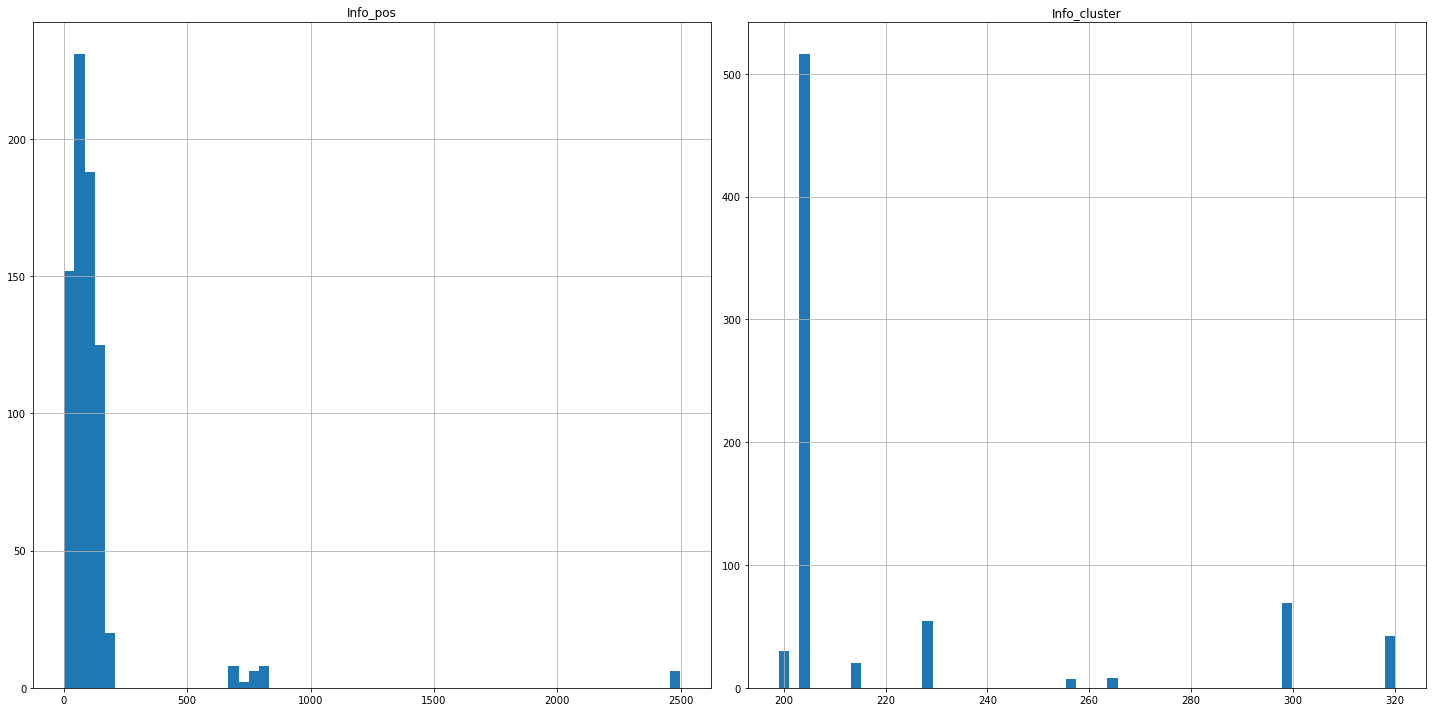

In [78]:
# info subset's distribution using a histogram
info_subset.hist(bins=60, figsize=(20,10))
save_fig("info_subset_distribution")

In [79]:
df.head()

,Info_PepID,Info_organism_id,Info_protein_id,Info_pos,Info_AA,Info_pubmed_id,Info_epitope_id,Info_host_id,Info_nPos,Info_nNeg,Info_type,Info_window,Info_cluster,Class,feat_esm1b_0,feat_esm1b_1,feat_esm1b_2,feat_esm1b_3,feat_esm1b_4,feat_esm1b_5,feat_esm1b_6,feat_esm1b_7,feat_esm1b_8,feat_esm1b_9,feat_esm1b_10,feat_esm1b_11,feat_esm1b_12,feat_esm1b_13,feat_esm1b_14,feat_esm1b_15,feat_esm1b_16,feat_esm1b_17,feat_esm1b_18,feat_esm1b_19,feat_esm1b_20,feat_esm1b_21,feat_esm1b_22,feat_esm1b_23,feat_esm1b_24,feat_esm1b_25,feat_esm1b_26,feat_esm1b_27,feat_esm1b_28,feat_esm1b_29,feat_esm1b_30,feat_esm1b_31,feat_esm1b_32,feat_esm1b_33,feat_esm1b_34,feat_esm1b_35,feat_esm1b_36,feat_esm1b_37,feat_esm1b_38,feat_esm1b_39,feat_esm1b_40,feat_esm1b_41,feat_esm1b_42,feat_esm1b_43,feat_esm1b_44,feat_esm1b_45,feat_esm1b_46,feat_esm1b_47,feat_esm1b_48,feat_esm1b_49,feat_esm1b_50,feat_esm1b_51,feat_esm1b_52,feat_esm1b_53,feat_esm1b_54,feat_esm1b_55,feat_esm1b_56,feat_esm1b_57,feat_esm1b_58,feat_esm1b_59,feat_esm1b_60,feat_esm1b_61,feat_esm1b_62,feat_esm1b_63,feat_esm1b_64,feat_esm1b_65,feat_esm1b_66,feat_esm1b_67,feat_esm1b_68,feat_esm1b_69,feat_esm1b_70,feat_esm1b_71,feat_esm1b_72,feat_esm1b_73,feat_esm1b_74,feat_esm1b_75,feat_esm1b_76,feat_esm1b_77,feat_esm1b_78,feat_esm1b_79,feat_esm1b_80,feat_esm1b_81,feat_esm1b_82,feat_esm1b_83,feat_esm1b_84,feat_esm1b_85,feat_esm1b_86,feat_esm1b_87,feat_esm1b_88,feat_esm1b_89,feat_esm1b_90,feat_esm1b_91,feat_esm1b_92,feat_esm1b_93,feat_esm1b_94,feat_esm1b_95,feat_esm1b_96,feat_esm1b_97,feat_esm1b_98,feat_esm1b_99,feat_esm1b_100,feat_esm1b_101,feat_esm1b_102,feat_esm1b_103,feat_esm1b_104,feat_esm1b_105,feat_esm1b_106,feat_esm1b_107,feat_esm1b_108,feat_esm1b_109,feat_esm1b_110,feat_esm1b_111,feat_esm1b_112,feat_esm1b_113,feat_esm1b_114,feat_esm1b_115,feat_esm1b_116,feat_esm1b_117,feat_esm1b_118,feat_esm1b_119,feat_esm1b_120,feat_esm1b_121,feat_esm1b_122,feat_esm1b_123,feat_esm1b_124,feat_esm1b_125,feat_esm1b_126,feat_esm1b_127,feat_esm1b_128,feat_esm1b_129,feat_esm1b_130,feat_esm1b_131,feat_esm1b_132,feat_esm1b_133,feat_esm1b_134,feat_esm1b_135,feat_esm1b_136,feat_esm1b_137,feat_esm1b_138,feat_esm1b_139,feat_esm1b_140,feat_esm1b_141,feat_esm1b_142,feat_esm1b_143,feat_esm1b_144,feat_esm1b_145,feat_esm1b_146,feat_esm1b_147,feat_esm1b_148,feat_esm1b_149,feat_esm1b_150,feat_esm1b_151,feat_esm1b_152,feat_esm1b_153,feat_esm1b_154,feat_esm1b_155,feat_esm1b_156,feat_esm1b_157,feat_esm1b_158,feat_esm1b_159,feat_esm1b_160,feat_esm1b_161,feat_esm1b_162,feat_esm1b_163,feat_esm1b_164,feat_esm1b_165,feat_esm1b_166,feat_esm1b_167,feat_esm1b_168,feat_esm1b_169,feat_esm1b_170,feat_esm1b_171,feat_esm1b_172,feat_esm1b_173,feat_esm1b_174,feat_esm1b_175,feat_esm1b_176,feat_esm1b_177,feat_esm1b_178,feat_esm1b_179,feat_esm1b_180,feat_esm1b_181,feat_esm1b_182,feat_esm1b_183,feat_esm1b_184,feat_esm1b_185,feat_esm1b_186,feat_esm1b_187,feat_esm1b_188,feat_esm1b_189,feat_esm1b_190,feat_esm1b_191,feat_esm1b_192,feat_esm1b_193,feat_esm1b_194,feat_esm1b_195,feat_esm1b_196,feat_esm1b_197,feat_esm1b_198,feat_esm1b_199,feat_esm1b_200,feat_esm1b_201,feat_esm1b_202,feat_esm1b_203,feat_esm1b_204,feat_esm1b_205,feat_esm1b_206,feat_esm1b_207,feat_esm1b_208,feat_esm1b_209,feat_esm1b_210,feat_esm1b_211,feat_esm1b_212,feat_esm1b_213,feat_esm1b_214,feat_esm1b_215,feat_esm1b_216,feat_esm1b_217,feat_esm1b_218,feat_esm1b_219,feat_esm1b_220,feat_esm1b_221,feat_esm1b_222,feat_esm1b_223,feat_esm1b_224,feat_esm1b_225,feat_esm1b_226,feat_esm1b_227,feat_esm1b_228,feat_esm1b_229,feat_esm1b_230,feat_esm1b_231,feat_esm1b_232,feat_esm1b_233,feat_esm1b_234,feat_esm1b_235,feat_esm1b_236,feat_esm1b_237,feat_esm1b_238,feat_esm1b_239,feat_esm1b_240,feat_esm1b_241,feat_esm1b_242,feat_esm1b_243,feat_esm1b_244,feat_esm1b_245,feat_esm1b_246,feat_esm1b_247,feat_esm1b_248,feat_esm1b_249,feat_esm1b_250,feat_esm1b_251,feat_esm1b_252,feat_esm1b_253,feat_esm1b_254,feat_esm1b_255,feat_esm1b_256,feat_esm1b_257,feat_esm1b_258,feat_esm1b_259,feat_esm1b_260,feat_esm1b_261,feat_esm1b_26

In [80]:
# Examine the class feature
df["Class"].value_counts()

 1    457
-1    289
Name: Class, dtype: int64

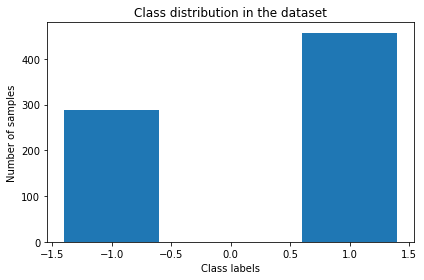

In [81]:
# check for class imbalances
unique_labels, counts = np.unique(df["Class"], return_counts=True)
plt.bar(unique_labels, counts)
plt.xlabel("Class labels")
plt.ylabel("Number of samples")
plt.title("Class distribution in the dataset")
save_fig("class_distribution")
plt.show()

From the above analysis, the classes are imbalanced

In [82]:
df["Class"].isna().sum()

0

There are no null values in the Class Feature

In [83]:
# Extract feat subset from the dataset for analysis
feat_subset = df.iloc[:, 14:]
feat_subset.head()

,feat_esm1b_0,feat_esm1b_1,feat_esm1b_2,feat_esm1b_3,feat_esm1b_4,feat_esm1b_5,feat_esm1b_6,feat_esm1b_7,feat_esm1b_8,feat_esm1b_9,feat_esm1b_10,feat_esm1b_11,feat_esm1b_12,feat_esm1b_13,feat_esm1b_14,feat_esm1b_15,feat_esm1b_16,feat_esm1b_17,feat_esm1b_18,feat_esm1b_19,feat_esm1b_20,feat_esm1b_21,feat_esm1b_22,feat_esm1b_23,feat_esm1b_24,feat_esm1b_25,feat_esm1b_26,feat_esm1b_27,feat_esm1b_28,feat_esm1b_29,feat_esm1b_30,feat_esm1b_31,feat_esm1b_32,feat_esm1b_33,feat_esm1b_34,feat_esm1b_35,feat_esm1b_36,feat_esm1b_37,feat_esm1b_38,feat_esm1b_39,feat_esm1b_40,feat_esm1b_41,feat_esm1b_42,feat_esm1b_43,feat_esm1b_44,feat_esm1b_45,feat_esm1b_46,feat_esm1b_47,feat_esm1b_48,feat_esm1b_49,feat_esm1b_50,feat_esm1b_51,feat_esm1b_52,feat_esm1b_53,feat_esm1b_54,feat_esm1b_55,feat_esm1b_56,feat_esm1b_57,feat_esm1b_58,feat_esm1b_59,feat_esm1b_60,feat_esm1b_61,feat_esm1b_62,feat_esm1b_63,feat_esm1b_64,feat_esm1b_65,feat_esm1b_66,feat_esm1b_67,feat_esm1b_68,feat_esm1b_69,feat_esm1b_70,feat_esm1b_71,feat_esm1b_72,feat_esm1b_73,feat_esm1b_74,feat_esm1b_75,feat_esm1b_76,feat_esm1b_77,feat_esm1b_78,feat_esm1b_79,feat_esm1b_80,feat_esm1b_81,feat_esm1b_82,feat_esm1b_83,feat_esm1b_84,feat_esm1b_85,feat_esm1b_86,feat_esm1b_87,feat_esm1b_88,feat_esm1b_89,feat_esm1b_90,feat_esm1b_91,feat_esm1b_92,feat_esm1b_93,feat_esm1b_94,feat_esm1b_95,feat_esm1b_96,feat_esm1b_97,feat_esm1b_98,feat_esm1b_99,feat_esm1b_100,feat_esm1b_101,feat_esm1b_102,feat_esm1b_103,feat_esm1b_104,feat_esm1b_105,feat_esm1b_106,feat_esm1b_107,feat_esm1b_108,feat_esm1b_109,feat_esm1b_110,feat_esm1b_111,feat_esm1b_112,feat_esm1b_113,feat_esm1b_114,feat_esm1b_115,feat_esm1b_116,feat_esm1b_117,feat_esm1b_118,feat_esm1b_119,feat_esm1b_120,feat_esm1b_121,feat_esm1b_122,feat_esm1b_123,feat_esm1b_124,feat_esm1b_125,feat_esm1b_126,feat_esm1b_127,feat_esm1b_128,feat_esm1b_129,feat_esm1b_130,feat_esm1b_131,feat_esm1b_132,feat_esm1b_133,feat_esm1b_134,feat_esm1b_135,feat_esm1b_136,feat_esm1b_137,feat_esm1b_138,feat_esm1b_139,feat_esm1b_140,feat_esm1b_141,feat_esm1b_142,feat_esm1b_143,feat_esm1b_144,feat_esm1b_145,feat_esm1b_146,feat_esm1b_147,feat_esm1b_148,feat_esm1b_149,feat_esm1b_150,feat_esm1b_151,feat_esm1b_152,feat_esm1b_153,feat_esm1b_154,feat_esm1b_155,feat_esm1b_156,feat_esm1b_157,feat_esm1b_158,feat_esm1b_159,feat_esm1b_160,feat_esm1b_161,feat_esm1b_162,feat_esm1b_163,feat_esm1b_164,feat_esm1b_165,feat_esm1b_166,feat_esm1b_167,feat_esm1b_168,feat_esm1b_169,feat_esm1b_170,feat_esm1b_171,feat_esm1b_172,feat_esm1b_173,feat_esm1b_174,feat_esm1b_175,feat_esm1b_176,feat_esm1b_177,feat_esm1b_178,feat_esm1b_179,feat_esm1b_180,feat_esm1b_181,feat_esm1b_182,feat_esm1b_183,feat_esm1b_184,feat_esm1b_185,feat_esm1b_186,feat_esm1b_187,feat_esm1b_188,feat_esm1b_189,feat_esm1b_190,feat_esm1b_191,feat_esm1b_192,feat_esm1b_193,feat_esm1b_194,feat_esm1b_195,feat_esm1b_196,feat_esm1b_197,feat_esm1b_198,feat_esm1b_199,feat_esm1b_200,feat_esm1b_201,feat_esm1b_202,feat_esm1b_203,feat_esm1b_204,feat_esm1b_205,feat_esm1b_206,feat_esm1b_207,feat_esm1b_208,feat_esm1b_209,feat_esm1b_210,feat_esm1b_211,feat_esm1b_212,feat_esm1b_213,feat_esm1b_214,feat_esm1b_215,feat_esm1b_216,feat_esm1b_217,feat_esm1b_218,feat_esm1b_219,feat_esm1b_220,feat_esm1b_221,feat_esm1b_222,feat_esm1b_223,feat_esm1b_224,feat_esm1b_225,feat_esm1b_226,feat_esm1b_227,feat_esm1b_228,feat_esm1b_229,feat_esm1b_230,feat_esm1b_231,feat_esm1b_232,feat_esm1b_233,feat_esm1b_234,feat_esm1b_235,feat_esm1b_236,feat_esm1b_237,feat_esm1b_238,feat_esm1b_239,feat_esm1b_240,feat_esm1b_241,feat_esm1b_242,feat_esm1b_243,feat_esm1b_244,feat_esm1b_245,feat_esm1b_246,feat_esm1b_247,feat_esm1b_248,feat_esm1b_249,feat_esm1b_250,feat_esm1b_251,feat_esm1b_252,feat_esm1b_253,feat_esm1b_254,feat_esm1b_255,feat_esm1b_256,feat_esm1b_257,feat_esm1b_258,feat_esm1b_259,feat_esm1b_260,feat_esm1b_261,feat_esm1b_262,feat_esm1b_263,feat_esm1b_264,feat_esm1b_265,feat_esm1b_266,feat_esm1b_267,feat_esm1b_268,feat_esm1b_269,feat_esm1b_270,feat_esm1b_271,feat_esm1b_272,feat_esm1b_273

In [ ]:
feat_subset.describe()

In [ ]:
feat_subset.info()

### Under Sampling

In [ ]:
# Graph of Info_clusters and frequency
freq_cluster = df["Info_cluster"].value_counts()
cluster_number = []
frequency_count = []
for key, value in freq_cluster.items():
    cluster_number.append(key)
    frequency_count.append(value)
print("Number of Unique Cluster numbers: ", len(freq_cluster))

# graph of top 5 cluster numbers
top_values = 5
plt.bar(cluster_number[:top_values], frequency_count[:top_values])
plt.xlabel("Cluster Number")
plt.ylabel("Frequency")
save_fig("frequent_cluster_numbers")
plt.show()

In [ ]:
# Graph of Info_type and Frequency
freq_type = df["Info_type"].value_counts()
info_type = []
frequency_count = []
for key, value in freq_type.items():
    info_type.append(key)
    frequency_count.append(value)
print("Number of unique info types: ", len(freq_type))

# graph of top 5 info types
top_values = 5
plt.bar(info_type[:top_values], frequency_count[:top_values])
plt.xlabel("Info Type")
plt.ylabel("Frequency")
save_fig("frequency_info_type")
plt.show()

In [ ]:
# a graph of class and frequency
freq_class = df["Class"].value_counts()
class_number = []
frequency_count = []
for key, value in freq_class.items():
    class_number.append(key)
    frequency_count.append(value)
print("Number of Unique Classes: ", len(freq_class))
top_values = 5
plt.bar(class_number[:top_values], frequency_count[:top_values])
plt.xlabel("Class")
plt.ylabel("Frequency")
save_fig("classes_frequency")
plt.show()

In [ ]:
# filtering the info_types which have more than 250 rows (occurrences)

requiredInfoType = []
for key, values in freq_type.items():
    if (value >= 250):
        requiredInfoType.append(key)

print(requiredInfoType)

In [ ]:
# filtering clusters which have more than 50 rows (occurrences)
requiredCluster = []
for key, value in freq_cluster.items():
    if (value >= 50):
        requiredCluster.append(key)
    
print(requiredCluster)

In [ ]:
# filtering class which has more than 250 rows (occurrences)
requiredClass = []
for key, value in freq_class.items():
    if (value >= 250):
        requiredClass.append(key)
        
print(requiredClass)

In [ ]:
# # taking the random 33 data from the requiredInfoType and forming the dataset
# listofDataFrames = []
# for info_type in requiredInfoType:
#     listofDataFrames.append(pd.DataFrame(df[df["Info_type"] == info_type].sample(n = 33)))
    
# sampledData = pd.concat(listofDataFrames)
# sampledData.shape

In [ ]:
# taking random 250 from the requiredClass and forming the dataset
listofDataFrames = []
for class_num in requiredClass:
    listofDataFrames.append(pd.DataFrame(df[df["Class"] == class_num].sample(n = 250)))
    
sampledData = pd.concat(listofDataFrames)
sampledData.shape

In [ ]:
# taking random rows and shuffling the dataframe
data = sampledData.sample(frac=1, random_state=1).reset_index()

# remove the rows that contain NULL values
data.dropna(inplace=True)
data.dropna(axis="columns")
data.reset_index(drop=True, inplace=True)

# remove columns which contains zeroes in the data
data = data.loc[:, (data != 0).any(axis=0)]

In [ ]:
print("Shape after removing rows with NULL Values")
print("Number of Rows {}".format(data.shape[0]))
print("Number of Columns {}".format(data.shape[1]))

In [ ]:
# converting the Info type column to required format (int)
# using LabelEncoder function from sklearn.preprocession library
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder().fit(data['Info_type'])
data['Info_type'] = encoder.transform(data['Info_type'])
values = encoder.inverse_transform(data['Info_type'])
type_column = data['Info_type']

# mapping the encoded value
encoded_type_column = {}
for i in range(len(data['Info_type'])):
    encoded_type_column[data['Info_type'][i]] = values[i]

print(encoded_type_column)